In [1]:
import sys
from qiskit.converters import circuit_to_dag, dag_to_circuit
import supremacy_generator as suprem_gen
import auto_cut_finder as cut_finder
import cutter as cutter
from qiskit.tools.visualization import dag_drawer

while(1):
    circ = suprem_gen.circuit_generator(circuit_dimension=(4,4,8), random_order=True)
    pareto_K_d = cut_finder.find_pareto_solutions(circ, num_clusters=2)
    bug_circ = None
    bug_cuts = None
    for pareto_key in pareto_K_d:
        try:
            sub_circs_no_bridge, complete_path_map, K, d = cutter.cut_circuit(circ, pareto_K_d[pareto_key])
        except:
            bug_circ = circ
            bug_cuts = pareto_K_d[pareto_key]
            print('BUG')
            sys.exit(0)
#         print(pareto_key, pareto_K_d[pareto_key])
#         print(K, d)

will run 877 times
will run 877 times
will run 877 times
will run 877 times
BUG


SystemExit: 0

/Users/weitang/Documents/Princeton/circuit_cutting/venv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3333: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


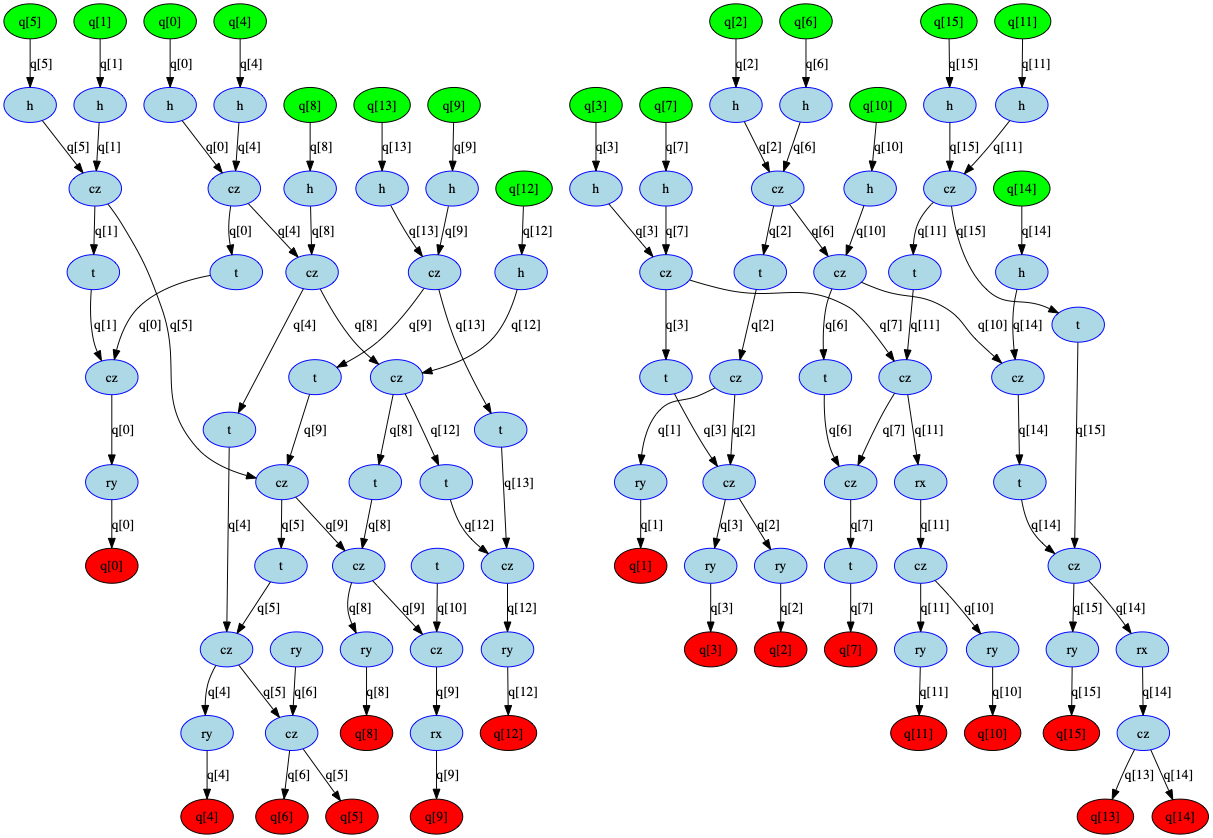

In [2]:
original_dag = circuit_to_dag(bug_circ)
positions = bug_cuts
cut_dag, path_order_dict = cutter.cut_edges(original_dag=original_dag, positions=positions)
dag_drawer(cut_dag)